##### Copyright 2023 The TF-Agents Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# REINFORCE agent

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/agents/tutorials/6_reinforce_tutorial">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/agents/blob/master/docs/tutorials/6_reinforce_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/agents/blob/master/docs/tutorials/6_reinforce_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/agents/docs/tutorials/6_reinforce_tutorial.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Introduction

This example shows how to train a [REINFORCE](https://www-anw.cs.umass.edu/~barto/courses/cs687/williams92simple.pdf) agent on the Cartpole environment using the TF-Agents library, similar to the [DQN tutorial](1_dqn_tutorial.ipynb).

![Cartpole environment](images/cartpole.png)

We will walk you through all the components in a Reinforcement Learning (RL) pipeline for training, evaluation and data collection.


## Setup

If you haven't installed the following dependencies, run:

In [2]:
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
!pip install tf-agents[reverb]
!pip install pyglet xvfbwrapper
!pip install tf-keras

Hit:1 http://us-central1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
0% [Connecting to security.ubuntu.com (185.125.190.36)] [Connected to developer

Get:5 https://nvidia.github.io/libnvidia-container/stable/ubuntu18.04/amd64  InRelease [1484 B]
Hit:6 https://download.docker.com/linux/ubuntu focal InRelease
Hit:7 https://nvidia.github.io/nvidia-container-runtime/stable/ubuntu18.04/amd64  InRelease
Hit:8 https://nvidia.github.io/nvidia-docker/ubuntu18.04/amd64  InRelease
0% [Connected to apt.llvm.org (199.232.198.49)] [Connecting to security.ubuntu.

Hit:4 https://apt.llvm.org/focal llvm-toolchain-focal-17 InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
0% [Connecting to security.ubuntu.com (185.125.190.36)] [Connecting to ppa.laun

0% [Waiting for headers] [Waiting for headers]

Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:11 http://security.ubuntu.com/ubuntu focal-security InRelease
0% [Working]

0% [Waiting for headers]

Hit:12 http://ppa.launchpad.net/longsleep/golang-backports/ubuntu focal InRelease
0% [Working]

0% [Waiting for headers]

Hit:13 http://ppa.launchpad.net/openjdk-r/ppa/ubuntu focal InRelease
0% [Working]

0% [Working]

0% [Working]

0% [Working]

0% [Working]

0% [Working]

0% [Working]

0% [Working]

0% [Working]

Fetched 1484 B in 1s (1075 B/s)




freeglut3-dev is already the newest version (2.8.1-3).
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
xvfb is already the newest version (2:1.20.13-1ubuntu1~20.04.12).


The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libparted-fs-resize0 libxmlb2
Use 'sudo apt autoremove' to remove them.


0 upgraded, 0 newly installed, 0 to remove and 115 not upgraded.


  Using cached imageio-2.4.0-py3-none-any.whl


  Attempting uninstall: imageio
    Found existing installation: imageio 2.33.1


    Uninstalling imageio-2.33.1:
      Successfully uninstalled imageio-2.33.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.22.0 requires imageio>=2.27, but you have imageio 2.4.0 which is incompatible.


  Using cached PyVirtualDisplay-3.0-py3-none-any.whl (15 kB)


  Using cached tf_agents-0.19.0-py3-none-any.whl.metadata (12 kB)


  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)


  Using cached gin_config-0.5.0-py3-none-any.whl (61 kB)


  Using cached gym-0.23.0-py3-none-any.whl
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)


  Using cached pygame-2.1.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.7 MB)


  Using cached tensorflow_probability-0.23.0-py2.py3-none-any.whl.metadata (13 kB)


  Using cached rlds-0.1.8-py3-none-manylinux2010_x86_64.whl (48 kB)


  Using cached dm_reverb-0.14.0-cp39-cp39-manylinux2014_x86_64.whl.metadata (17 kB)


  Using cached portpicker-1.6.0-py3-none-any.whl.metadata (1.5 kB)


  Using cached gym_notices-0.0.8-py3-none-any.whl (3.0 kB)


Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
Using cached dm_reverb-0.14.0-cp39-cp39-manylinux2014_x86_64.whl (6.4 MB)
Using cached tensorflow_probability-0.23.0-py2.py3-none-any.whl (6.9 MB)
Using cached tf_agents-0.19.0-py3-none-any.whl (1.4 MB)
Using cached portpicker-1.6.0-py3-none-any.whl (16 kB)


  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:


      Successfully uninstalled typing_extensions-4.9.0


  Using cached tf_keras-2.15.0-py3-none-any.whl.metadata (1.6 kB)
Using cached tf_keras-2.15.0-py3-none-any.whl (1.7 MB)


In [3]:
import os
# Keep using keras-2 (tf-keras) rather than keras-3 (keras).
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import base64
import imageio
import IPython
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay
import reverb

import tensorflow as tf

from tf_agents.agents.reinforce import reinforce_agent
from tf_agents.drivers import py_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.networks import actor_distribution_network
from tf_agents.policies import py_tf_eager_policy
from tf_agents.replay_buffers import reverb_replay_buffer
from tf_agents.replay_buffers import reverb_utils
from tf_agents.specs import tensor_spec
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

2023-12-22 14:05:03.363396: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 14:05:03.363443: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 14:05:03.365008: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Hyperparameters

In [5]:
env_name = "CartPole-v0" # @param {type:"string"}
num_iterations = 250 # @param {type:"integer"}
collect_episodes_per_iteration = 2 # @param {type:"integer"}
replay_buffer_capacity = 2000 # @param {type:"integer"}

fc_layer_params = (100,)

learning_rate = 1e-3 # @param {type:"number"}
log_interval = 25 # @param {type:"integer"}
num_eval_episodes = 10 # @param {type:"integer"}
eval_interval = 50 # @param {type:"integer"}

## Environment

Environments in RL represent the task or problem that we are trying to solve. Standard environments can be easily created in TF-Agents using `suites`. We have different `suites` for loading environments from sources such as the OpenAI Gym, Atari, DM Control, etc., given a string environment name.

Now let us load the CartPole environment from the OpenAI Gym suite.

In [6]:
env = suite_gym.load(env_name)

We can render this environment to see how it looks. A free-swinging pole is attached to a cart.  The goal is to move the cart right or left in order to keep the pole pointing up.

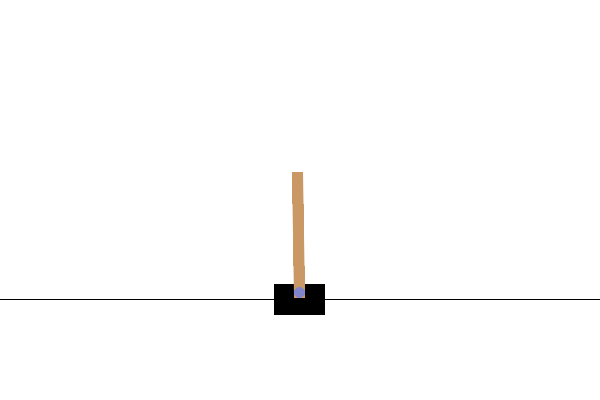

In [7]:
#@test {"skip": true}
env.reset()
PIL.Image.fromarray(env.render())

The `time_step = environment.step(action)` statement takes `action` in the environment.  The `TimeStep` tuple returned contains the environment's next observation and reward for that action. The `time_step_spec()` and `action_spec()` methods in the environment return the specifications (types, shapes, bounds) of the `time_step` and `action` respectively.

In [8]:
print('Observation Spec:')
print(env.time_step_spec().observation)
print('Action Spec:')
print(env.action_spec())

Observation Spec:
BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='observation', minimum=[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], maximum=[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38])
Action Spec:
BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=1)


So, we see that observation is an array of 4 floats: the position and velocity of the cart, and the angular position and velocity of the pole. Since only two actions are possible (move left or move right), the `action_spec` is a scalar where 0 means "move left" and 1 means "move right."

In [9]:
time_step = env.reset()
print('Time step:')
print(time_step)

action = np.array(1, dtype=np.int32)

next_time_step = env.step(action)
print('Next time step:')
print(next_time_step)

Time step:
TimeStep(
{'step_type': array(0, dtype=int32),
 'reward': array(0., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([-0.00907558,  0.02627698, -0.01019297,  0.04808202], dtype=float32)})
Next time step:
TimeStep(
{'step_type': array(1, dtype=int32),
 'reward': array(1., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([-0.00855004,  0.2215436 , -0.00923133, -0.24779937], dtype=float32)})


Usually we create two environments: one for training and one for evaluation. Most environments are written in pure python, but they can be easily converted to TensorFlow using the `TFPyEnvironment` wrapper. The original environment's API uses numpy arrays, the `TFPyEnvironment` converts these to/from `Tensors` for you to more easily interact with TensorFlow policies and agents.


In [10]:
train_py_env = suite_gym.load(env_name)
eval_py_env = suite_gym.load(env_name)

train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

## Agent

The algorithm that we use to solve an RL problem is represented as an `Agent`. In addition to the REINFORCE agent, TF-Agents provides standard implementations of a variety of `Agents` such as [DQN](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf), [DDPG](https://arxiv.org/pdf/1509.02971.pdf), [TD3](https://arxiv.org/pdf/1802.09477.pdf), [PPO](https://arxiv.org/abs/1707.06347) and [SAC](https://arxiv.org/abs/1801.01290).

To create a REINFORCE Agent, we first need an `Actor Network` that can learn to predict the action given an observation from the environment.

We can easily create an `Actor Network` using the specs of the observations and actions. We can specify the layers in the network which, in this example, is the `fc_layer_params` argument set to a tuple of `ints` representing the sizes of each hidden layer (see the Hyperparameters section above).


In [11]:
actor_net = actor_distribution_network.ActorDistributionNetwork(
    train_env.observation_spec(),
    train_env.action_spec(),
    fc_layer_params=fc_layer_params)

We also need an `optimizer` to train the network we just created, and a `train_step_counter` variable to keep track of how many times the network was updated.


In [12]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

tf_agent = reinforce_agent.ReinforceAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    actor_network=actor_net,
    optimizer=optimizer,
    normalize_returns=True,
    train_step_counter=train_step_counter)
tf_agent.initialize()

## Policies

In TF-Agents, policies represent the standard notion of policies in RL: given a `time_step` produce an action or a distribution over actions. The main method is `policy_step = policy.action(time_step)` where `policy_step` is a named tuple `PolicyStep(action, state, info)`.  The `policy_step.action` is the `action` to be applied to the environment, `state` represents the state for stateful (RNN) policies and `info` may contain auxiliary information such as log probabilities of the actions.

Agents contain two policies: the main policy that is used for evaluation/deployment (agent.policy) and another policy that is used for data collection (agent.collect_policy).

In [13]:
eval_policy = tf_agent.policy
collect_policy = tf_agent.collect_policy

## Metrics and Evaluation

The most common metric used to evaluate a policy is the average return. The return is the sum of rewards obtained while running a policy in an environment for an episode, and we usually average this over a few episodes. We can compute the average return metric as follows.


In [14]:
#@test {"skip": true}
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


# Please also see the metrics module for standard implementations of different
# metrics.

## Replay Buffer

In order to keep track of the data collected from the environment, we will use [Reverb](https://deepmind.com/research/open-source/Reverb), an efficient, extensible, and easy-to-use replay system by Deepmind. It stores experience data when we collect trajectories and is consumed during training.

This replay buffer is constructed using specs describing the tensors that are to be stored, which can be obtained from the agent using `tf_agent.collect_data_spec`.

In [15]:
table_name = 'uniform_table'
replay_buffer_signature = tensor_spec.from_spec(
      tf_agent.collect_data_spec)
replay_buffer_signature = tensor_spec.add_outer_dim(
      replay_buffer_signature)
table = reverb.Table(
    table_name,
    max_size=replay_buffer_capacity,
    sampler=reverb.selectors.Uniform(),
    remover=reverb.selectors.Fifo(),
    rate_limiter=reverb.rate_limiters.MinSize(1),
    signature=replay_buffer_signature)

reverb_server = reverb.Server([table])

replay_buffer = reverb_replay_buffer.ReverbReplayBuffer(
    tf_agent.collect_data_spec,
    table_name=table_name,
    sequence_length=None,
    local_server=reverb_server)

rb_observer = reverb_utils.ReverbAddEpisodeObserver(
    replay_buffer.py_client,
    table_name,
    replay_buffer_capacity
)

[reverb/cc/platform/tfrecord_checkpointer.cc:162]  Initializing TFRecordCheckpointer in /tmpfs/tmp/tmpkagdqs1n.
[reverb/cc/platform/tfrecord_checkpointer.cc:565] Loading latest checkpoint from /tmpfs/tmp/tmpkagdqs1n
[reverb/cc/platform/default/server.cc:71] Started replay server on port 41705


For most agents, the `collect_data_spec` is a `Trajectory` named tuple containing the observation, action, reward etc.

## Data Collection

As REINFORCE learns from whole episodes, we define a function to collect an episode using the given data collection policy and save the data (observations, actions, rewards etc.) as trajectories in the replay buffer. Here we are using 'PyDriver' to run the experience collecting loop. You can learn more about TF Agents driver in our [drivers tutorial](https://www.tensorflow.org/agents/tutorials/4_drivers_tutorial).

In [16]:
#@test {"skip": true}

def collect_episode(environment, policy, num_episodes):

  driver = py_driver.PyDriver(
    environment,
    py_tf_eager_policy.PyTFEagerPolicy(
      policy, use_tf_function=True),
    [rb_observer],
    max_episodes=num_episodes)
  initial_time_step = environment.reset()
  driver.run(initial_time_step)

## Training the agent

The training loop involves both collecting data from the environment and optimizing the agent's networks. Along the way, we will occasionally evaluate the agent's policy to see how we are doing.

The following will take ~3 minutes to run.

In [17]:
#@test {"skip": true}
try:
  %%time
except:
  pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
tf_agent.train = common.function(tf_agent.train)

# Reset the train step
tf_agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, tf_agent.policy, num_eval_episodes)
returns = [avg_return]

for _ in range(num_iterations):

  # Collect a few episodes using collect_policy and save to the replay buffer.
  collect_episode(
      train_py_env, tf_agent.collect_policy, collect_episodes_per_iteration)

  # Use data from the buffer and update the agent's network.
  iterator = iter(replay_buffer.as_dataset(sample_batch_size=1))
  trajectories, _ = next(iterator)
  train_loss = tf_agent.train(experience=trajectories)

  replay_buffer.clear()

  step = tf_agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss.loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, tf_agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)

[reverb/cc/client.cc:165] Sampler and server are owned by the same process (47292) so Table uniform_table is accessed directly without gRPC.


I0000 00:00:1703253913.189247   48625 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (47292) so Table uniform_table is accessed directly without gRPC.


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (47292) so Table uniform_table is accessed directly without gRPC.


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (47292) so Table uniform_table is accessed directly without gRPC.


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (47292) so Table uniform_table is accessed directly without gRPC.


step = 25: loss = 1.8318419456481934


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (47292) so Table uniform_table is accessed directly without gRPC.


step = 50: loss = 0.0070743560791015625


step = 50: Average Return = 9.800000190734863


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (47292) so Table uniform_table is accessed directly without gRPC.


step = 75: loss = 1.1006038188934326


step = 100: loss = 0.5719594955444336


step = 100: Average Return = 50.29999923706055


step = 125: loss = -1.2458715438842773


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (47292) so Table uniform_table is accessed directly without gRPC.


step = 150: loss = 1.9363441467285156


step = 150: Average Return = 98.30000305175781


step = 175: loss = 0.8784818649291992


step = 200: loss = 1.9726766347885132


step = 200: Average Return = 143.6999969482422


step = 225: loss = 2.316105842590332


step = 250: loss = 2.5175299644470215


step = 250: Average Return = 191.5


## Visualization


### Plots

We can plot return vs global steps to see the performance of our agent. In `Cartpole-v0`, the environment gives a reward of +1 for every time step the pole stays up, and since the maximum number of steps is 200, the maximum possible return is also 200.

(0.7150002002716054, 250.0)

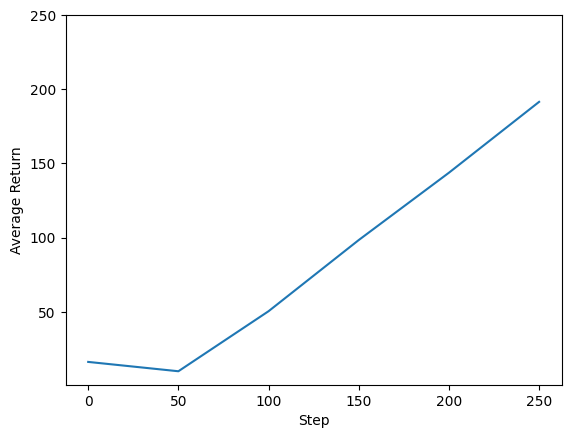

In [18]:
#@test {"skip": true}

steps = range(0, num_iterations + 1, eval_interval)
plt.plot(steps, returns)
plt.ylabel('Average Return')
plt.xlabel('Step')
plt.ylim(top=250)

### Videos

It is helpful to visualize the performance of an agent by rendering the environment at each step. Before we do that, let us first create a function to embed videos in this colab.

In [19]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

The following code visualizes the agent's policy for a few episodes:

In [20]:
num_episodes = 3
video_filename = 'imageio.mp4'
with imageio.get_writer(video_filename, fps=60) as video:
  for _ in range(num_episodes):
    time_step = eval_env.reset()
    video.append_data(eval_py_env.render())
    while not time_step.is_last():
      action_step = tf_agent.policy.action(time_step)
      time_step = eval_env.step(action_step.action)
      video.append_data(eval_py_env.render())

embed_mp4(video_filename)

[swscaler @ 0x5563cf186880] Warning: data is not aligned! This can lead to a speed loss
